In [ ]:
import json
import os
import numpy as np
import pandas as pd
import emoji

#root = "sejal"

dirs = ["sejal", "camille"]
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False

identifier, photos, captions = [], [], []
collections, no_image, no_caption = 0, 0, 0
scraper_failed = 0
posts_per_user = []
mentions, hashtags, emojis, has_quotes, vanilla = 0, 0, 0, 0, 0
running_total = 0
for root in dirs:
    for fn in os.listdir("profiles_" + root + "/"):
        if fn.endswith(".json"):
            f = open("profiles_" + root + "/" + fn)
            num_valid_entries = 0
            num_invalid_entries = 0
            user_identifiers, user_photos, user_captions = [], [], []
            h, m, q, e, v = 0, 0, 0, 0, 0
            data = json.load(f)
            try:
                posts = data["posts"]
            except:
                if data["num_of_posts"] >= 0 and data["num_of_posts"] <= 100:
                    print(data["num_of_posts"])
                    scraper_failed += data["num_of_posts"]
                else:
                    scraper_failed += 100
            for p in posts:
                if len(p["imgs"]) > 1:
                    collections += 1
                    num_invalid_entries += 1
                elif len(p["imgs"]) == 0:
                    no_image += 1
                    num_valid_entries += 1
                elif p["caption"] == "":
                    no_caption += 1
                    num_invalid_entries += 1
                else:
                    num_valid_entries += 1
                    vanilla_flag = True
                    user_identifiers.append(data["username"])
                    user_photos.append(p["imgs"][0])
                    if '"' in p["caption"]:
                        q += 1
                        vanilla_flag = False
                    if '@' in p["caption"]:
                        m += 1
                        vanilla_flag = False
                    if '#' in p["caption"]:
                        h += 1
                        vanilla_flag = False
                    if text_has_emoji(p["caption"]):
                        e += 1
                        vanilla_flag = False
                    if vanilla_flag:
                        v += 1
                    user_captions.append(p["caption"].replace('"', '\''))
            if num_valid_entries >= 10:
                running_total += num_valid_entries
                hashtags += h
                has_quotes += q
                mentions += m
                emojis += e
                vanilla += v
                identifier.append(user_identifiers)
                photos.append(user_photos)
                captions.append(user_captions)
            else:
                pass
            posts_per_user.append(num_valid_entries)
            if data["num_of_posts"] < 100:
                scraper_failed += data["num_of_posts"] - num_valid_entries - num_invalid_entries
            else:
                scraper_failed += 100 - num_valid_entries - num_invalid_entries
            f.close()
        
left_space = 25
num_space = 8
too_few = sum([p if (p < 10 and p > 0) else 0 for p in posts_per_user])
total = running_total + collections + no_image + no_caption + too_few
print("classification".ljust(left_space), "# posts".rjust(num_space), "pct %".rjust(num_space))
print("–––––––––––––––––––––––".ljust(left_space), "––––––".rjust(num_space), "––––––".rjust(num_space))
print("scraper failed".ljust(left_space), str(scraper_failed).rjust(num_space), str(round(scraper_failed * 100/ (total + scraper_failed), 2)).rjust(num_space))
print("TOTAL SCRAPED".ljust(left_space), ("("+str(total)+")").rjust(num_space))
print("")
print("total number of users".ljust(left_space), str(len(posts_per_user)).rjust(num_space))
posts_per_user2 = [p for p in posts_per_user if p >= 10]
print("mean ppu before".ljust(left_space), str(round(np.mean(posts_per_user), 2)).rjust(num_space))
print("mean ppu after".ljust(left_space), str(round(np.mean(posts_per_user2), 2)).rjust(num_space))
print("dumping out (users)".ljust(left_space), str(len(posts_per_user) - len(posts_per_user2)).rjust(num_space))
print("dumping out (posts)".ljust(left_space), str(too_few).rjust(num_space))
print("median ppu before".ljust(left_space), str(np.median(posts_per_user)).rjust(num_space))
print("median ppu after".ljust(left_space), str(np.median(posts_per_user2)).rjust(num_space))
print("")

throwing_out = collections + no_image + no_caption + too_few
print("THROWING OUT".ljust(left_space), ("(" + str(throwing_out) + ")").rjust(num_space), ("("+str(round(throwing_out * 100 / total, 2))+")").rjust(num_space))
print("no caption".ljust(left_space), str(no_caption).rjust(num_space), str(round((no_caption / total) * 100, 2)).rjust(num_space))
print("no image".ljust(left_space), str(no_image).rjust(num_space), str(round((no_image / total) * 100, 2)).rjust(num_space))
print("collection".ljust(left_space), str(collections).rjust(num_space), str(round((collections / total) * 100, 2)).rjust(num_space))
print("too few".ljust(left_space), str(too_few).rjust(num_space), str(round((too_few / total) * 100, 2)).rjust(num_space))
print("")

print("USABLE".ljust(left_space), ("(" + str(running_total) + ")").rjust(num_space), ("("+str(round(running_total*100/total, 2))+")").rjust(num_space))
print("<< vanilla >>".ljust(left_space), str(vanilla).rjust(num_space), str(round((vanilla / total) * 100, 2)).rjust(num_space))
nonvanilla = running_total - vanilla
print("<< non-vanilla >>".ljust(left_space), str(nonvanilla).rjust(num_space), str(round((nonvanilla / total) * 100, 2)).rjust(num_space))
print("   mentions".ljust(left_space), str(mentions).rjust(num_space), str(round((mentions / total) * 100, 2)).rjust(num_space))
print("   hashtags".ljust(left_space), str(hashtags).rjust(num_space), str(round((hashtags / total) * 100, 2)).rjust(num_space))
print("   emojis".ljust(left_space), str(emojis).rjust(num_space), str(round((emojis / total) * 100, 2)).rjust(num_space))
print("   has quotes".ljust(left_space), str(has_quotes).rjust(num_space), str(round((has_quotes / total) * 100, 2)).rjust(num_space))

#print("–––––––––––––––––––––––––".center(left_space), "–––––".rjust(num_space), "–––––".rjust(num_space))

#with open('data_' + root + '.csv', 'w') as f:
with open('masterdata.csv', 'w') as f:
    f.write("username,photo,caption\n")
    for i in range(len(photos)):
        for j in range(len(photos[i])):
            f.write("%s,%s,\"%s\"\n" % (identifier[i][j],photos[i][j], captions[i][j]))
f.close()

try:
    #csv = pd.read_csv('data_' + root + '.csv', header=0)
    csv = pd.read_csv('masterdata.csv', header=0)
    csv.drop_duplicates(keep="last",inplace=True)
    #csv.to_csv('data_' + root + '.csv', index=False)
    csv.to_csv('masterdata.csv', index=False)
except:
    print('pandas stuff did not work')


classification             # posts    pct %
–––––––––––––––––––––––     ––––––   ––––––
scraper failed               27816    29.58
TOTAL SCRAPED              (66221)

total number of users         1580
mean ppu before              28.38
mean ppu after               45.01
dumping out (users)            633
dumping out (posts)           2225
median ppu before             15.0
median ppu after              44.0

THROWING OUT               (23598)  (35.64)
no caption                    4728     7.14
no image                      1676     2.53
collection                   14969     22.6
too few                       2225     3.36

USABLE                     (42623)  (64.36)
<< vanilla >>                18232    27.53
<< non-vanilla >>            24391    36.83
   mentions                   3343     5.05
   hashtags                   7925    11.97
   emojis                    15552    23.48
   has quotes                  736     1.11


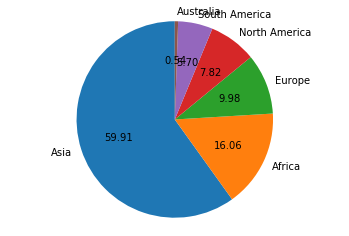

In [51]:
import matplotlib.pyplot as plt
pieLabels = ['Asia', 'Africa', 'Europe', 'North America', 'South America', 'Australia']
populationShare = [59.69, 16, 9.94, 7.79, 5.68, 0.54]
figureObject, axesObject = plt.subplots()
axesObject.pie(populationShare, labels=pieLabels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.show()

[[ 4607  1630 14824  2219]
 [18139 24023     0     0]]


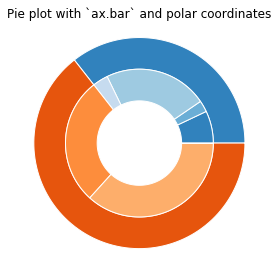

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

size = 0.3
vals = np.array([[no_caption, no_image, collections, too_few], [vanilla, nonvanilla, 0, 0]])
labels = np.array([["no caption", "no image", "collection", "too few"], ["vanilla", "non-vanilla", 0, 0]])
print(vals)
#normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
#obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([0, 1, 2, 3, 5, 6, 0, 0]))

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, label=labels, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

In [ ]:
import csv
csv_file = 'camillebowman_followers.csv'
txt_file = 'camille_followers.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        i = 0
        for row in csv.reader(my_input_file):
            if i == 0:
                my_output_file.write(''.join(row)[1::] + '\n')
            elif i % 2 == 0:
                my_output_file.write(''.join(row) + '\n')
            i += 1
    my_output_file.close()